# Analyse Exploratoire des logs AVEC erreur

### Imports (fichier & modules)

In [2]:
import pandas as pda
import matplotlib.pyplot as plt
import numpy as np
#import os
#print(os.getcwd())
#print(os.listdir('241016_LogETL'))

In [3]:
tab = pda.read_csv('../Data/241016_LogETLError.csv', sep=';', dtype={'Program_Id': str, 'Schedules_Id': str, 'Schedules_Name': str})

### Le fichier 241016_LogETLError.csv

In [8]:
tab.shape

(202402, 19)

Il y a 202 402 lignes et 19 colonnes dans le dataframe. 

In [9]:
tab.columns

Index(['Server version', 'Client version', 'Product', 'Project name', 'Model',
       'Date', 'Time', 'Row number', 'Type', 'Message', 'ETL_StartDateTime',
       'Launcher_Id', 'Launcher_Name', 'Machine', 'Program_Id', 'Program_Name',
       'Schedules_Id', 'Schedules_Name', 'Schedules_StartDateTime'],
      dtype='object')

In [10]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202402 entries, 0 to 202401
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Server version           202402 non-null  object
 1   Client version           202402 non-null  object
 2   Product                  202402 non-null  object
 3   Project name             202402 non-null  object
 4   Model                    202402 non-null  object
 5   Date                     202402 non-null  object
 6   Time                     202402 non-null  object
 7   Row number               202402 non-null  int64 
 8   Type                     202402 non-null  object
 9   Message                  202402 non-null  object
 10  ETL_StartDateTime        202402 non-null  object
 11  Launcher_Id              201963 non-null  object
 12  Launcher_Name            202402 non-null  object
 13  Machine                  202402 non-null  object
 14  Program_Id          

In [11]:
# Calculer le nombre de valeurs uniques pour chaque colonne
nb_valeurs_uniques = tab.nunique()

# Afficher les résultats
print(nb_valeurs_uniques)

Server version                  1
Client version                  1
Product                         3
Project name                    1
Model                          61
Date                           51
Time                       202402
Row number                 195285
Type                            2
Message                       686
ETL_StartDateTime             169
Launcher_Id                     5
Launcher_Name                   6
Machine                         6
Program_Id                     12
Program_Name                   13
Schedules_Id                   23
Schedules_Name                 23
Schedules_StartDateTime       167
dtype: int64


On pourra supprimer les colonnes 1,2,4.

In [12]:
tab.head()


,Server version,Client version,Product,Project name,Model,Date,Time,Row number,Type,Message,ETL_StartDateTime,Launcher_Id,Launcher_Name,Machine,Program_Id,Program_Name,Schedules_Id,Schedules_Name,Schedules_StartDateTime
0,6.0.2,6.0.2,MyReport Server BE,MySystem BE,TMS/MF_Factures,2024-08-25,1:15:41.6121442,0,Erreur,Impossible d'ouvrir la requête SQL sur la conn...,2024-08-24 23:32:03,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_3a685d15-3172-4faf-92e5-4b0918f6b315,Tous les jours,ETLPROGRAMMATIONCYZ21D,ETL Jour 23h30,2024-08-24 23:31:51
1,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoCivilRegi...,2024-08-25,12:01:39.3223368,239,Erreur,Connexion au web service impossible https://y2...,2024-08-25 12:01:37,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34
2,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoAssignmen...,2024-08-25,12:01:39.3223399,239,Erreur,Connexion au web service impossible https://y2...,2024-08-25 12:01:37,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34
3,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Salariés/ConsoCivilRegi...,2024-08-25,12:01:39.8130691,240,Erreur,Connexion au web service impossible https://y2...,2024-08-25 12:01:37,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34
4,6.0.2,6.0.2,MyReport Server BE,MySystem BE,DW/CEGID/Intermédiaire/Bulletin/ConsoBulletinA...,2024-08-25,12:01:39.934105,1,Erreur,Connexion au web service impossible https://y2...,2024-08-25 12:01:37,NaN,Serveur (programmation),VDRREPORTFRONT,ETL_35f084e3-349b-4823-9358-3ecc77286cbf,"Toutes les semaines, le dimanche",ETLPROGRAMMATIONNR50Q4,ETL Hebdo Dim 12h,2024-08-25 12:01:34


## Regardons le détail par colonne

### Server version

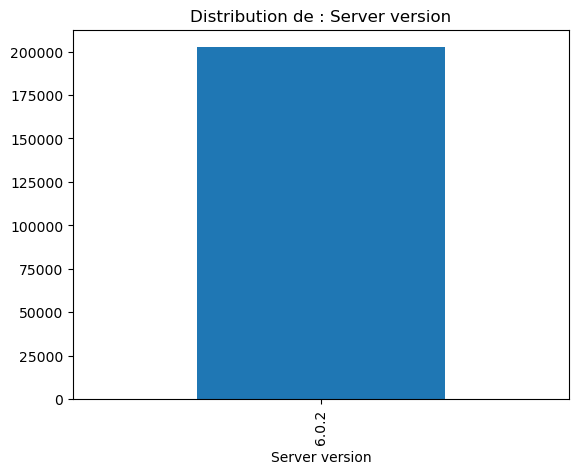

In [13]:
col= tab.columns[0]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

### Client version

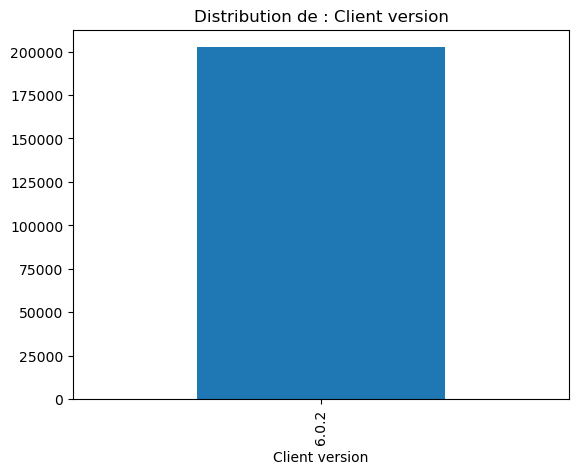

In [15]:
col= tab.columns[1]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

### Product

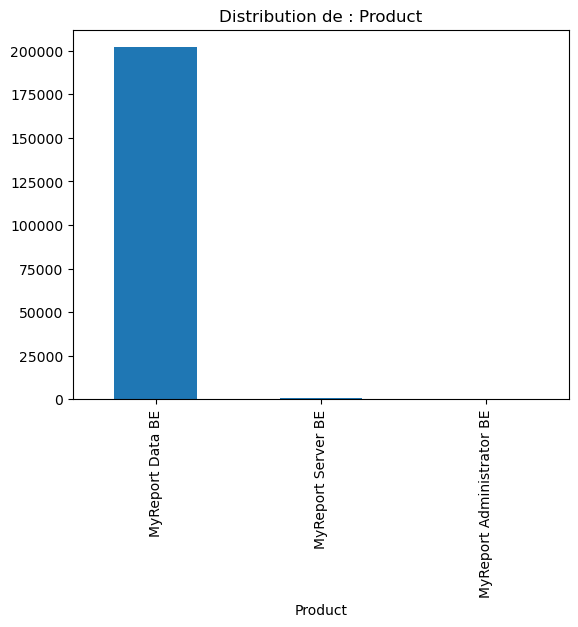

In [20]:
col= tab.columns[2]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

### Project name

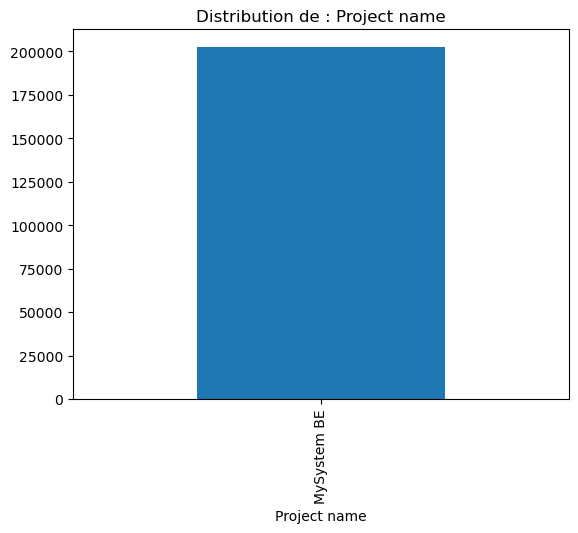

In [22]:
col= tab.columns[3]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

### Insert mode

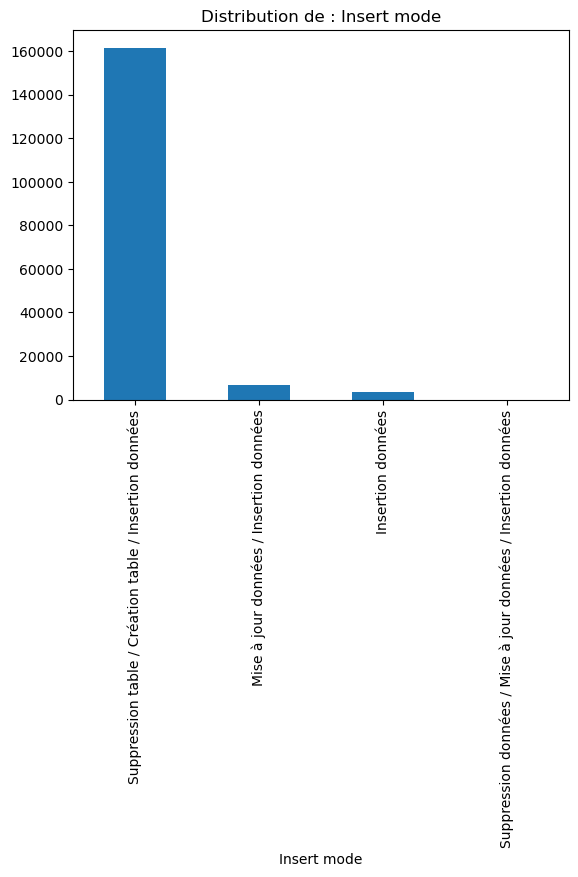

In [88]:
col= tab.columns[4]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

### Date

In [26]:
col= tab.columns[5]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Date


Date
2024-08-29    197568
2024-10-03      4239
2024-09-06       164
2024-08-25       111
2024-10-01        22
2024-09-17        18
2024-09-30        15
2024-09-23        15
2024-09-21        15
2024-10-02        14
2024-09-03        13
2024-09-20        12
2024-10-13        11
2024-09-24        11
2024-09-18        11
2024-09-09        10
2024-10-12        10
2024-10-05         9
2024-10-14         9
2024-10-06         9
2024-10-07         9
2024-09-26         6
2024-08-26         6
2024-10-04         6
2024-09-04         5
2024-10-09         5
2024-10-15         5
2024-09-10         5
2024-09-27         5
2024-10-08         4
2024-08-27         4
2024-10-10         4
2024-10-11         4
2024-09-05         4
2024-09-02         4
2024-09-25         4
2024-09-19         4
2024-09-16         4
2024-08-28         3
2024-09-11         3
2024-09-12         3
2024-09-01         3
2024-09-22         3
2024-09-15         2
2024-09-13         2
2024-08-31         2
2024-08-30         2
2024-10-

### Time

In [27]:
col= tab.columns[6]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Time


Time
1:15:41.6121442     1
11:12:06.7626542    1
11:12:06.763684     1
11:12:06.7641407    1
11:12:06.7645835    1
                   ..
11:11:16.5374476    1
11:11:16.5379817    1
11:11:16.5385412    1
11:11:16.5391045    1
0:58:43.9673117     1
Name: count, Length: 202402, dtype: int64

### Row number

In [28]:
col= tab.columns[7]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Row number


Row number
0           219
39           15
62           14
1012         12
64           11
           ... 
3114525       1
3114526       1
3114527       1
3114528       1
19811793      1
Name: count, Length: 195285, dtype: int64

### Type

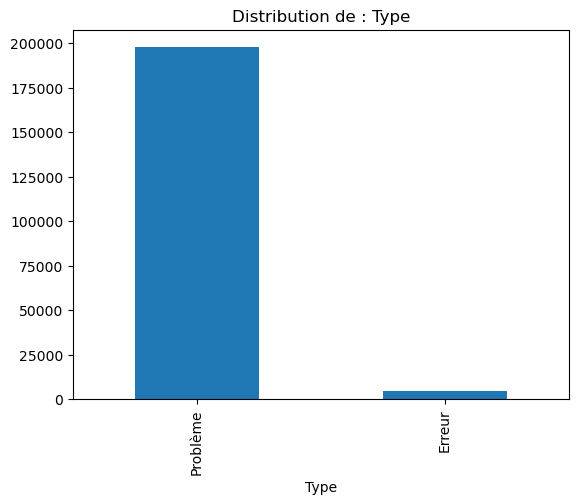

In [31]:
col= tab.columns[8]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

### Message

In [33]:
col= tab.columns[9]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Message


Message
La taille du champ Libellé Zone Depart" (30) est trop petite pour pouvoir y insérer la valeur PRIMEVER PROVENCE  13 CHATEAURENARD* (36)"                                                                                               48330
La taille du champ Libellé Zone Depart" (30) est trop petite pour pouvoir y insérer la valeur SERRES ET PILAIRE CHÂTEAURENARD* (32)"                                                                                                   21327
La taille du champ Libellé Zone Depart" (30) est trop petite pour pouvoir y insérer la valeur PRIMEVER NORMANDIE 50 ST AMAND* (31)"                                                                                                    12524
La taille du champ Libellé Zone Depart" (30) est trop petite pour pouvoir y insérer la valeur TRAFIBA (TFB) ST GEOURS DE MAREMME* (35)"                                                                                                12342
La taille du champ Libellé Zone Arrivée" (30

On doit pouvoir segmenter ces erreurs par type? 

### ETL_StartDateTime

In [44]:
col= tab.columns[10]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : ETL_StartDateTime


ETL_StartDateTime
2024-08-29 11:08:50    197560
2024-10-03 17:28:34      3848
2024-10-03 17:49:02       191
2024-10-03 17:47:44       191
2024-09-06 16:35:43       144
                        ...  
2024-09-21 10:57:01         1
2024-09-21 09:02:01         1
2024-09-21 07:56:56         1
2024-09-18 14:21:30         1
2024-09-23 22:47:09         1
Name: count, Length: 169, dtype: int64

### Launcher_Id

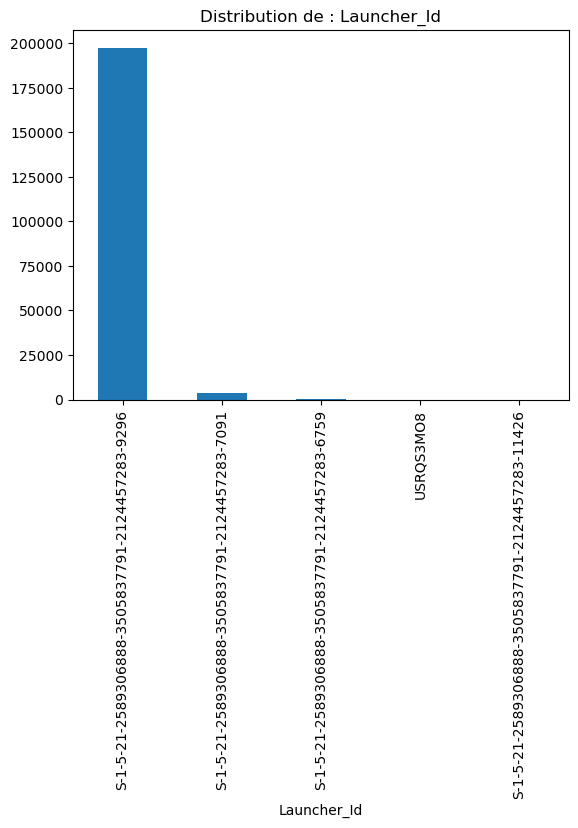

In [35]:
col= tab.columns[11]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

### Launcher_Name

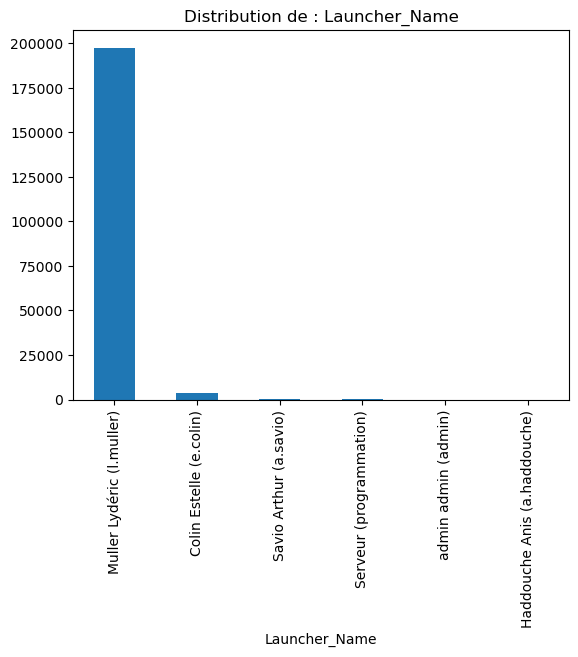

In [37]:
col= tab.columns[12]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

### Machine

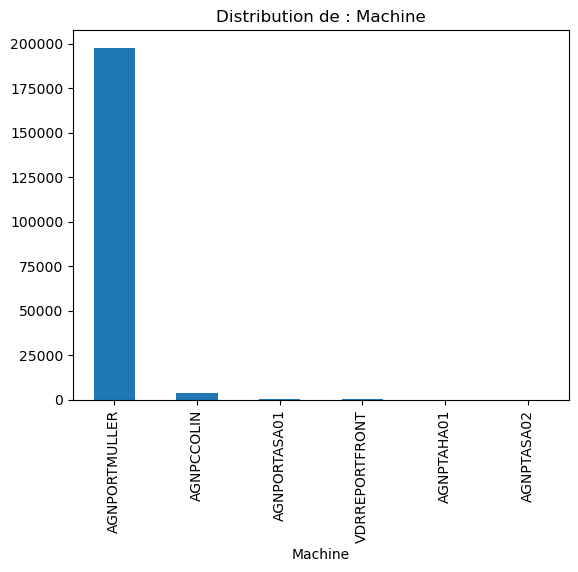

In [40]:
col= tab.columns[13]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

### Program_Id

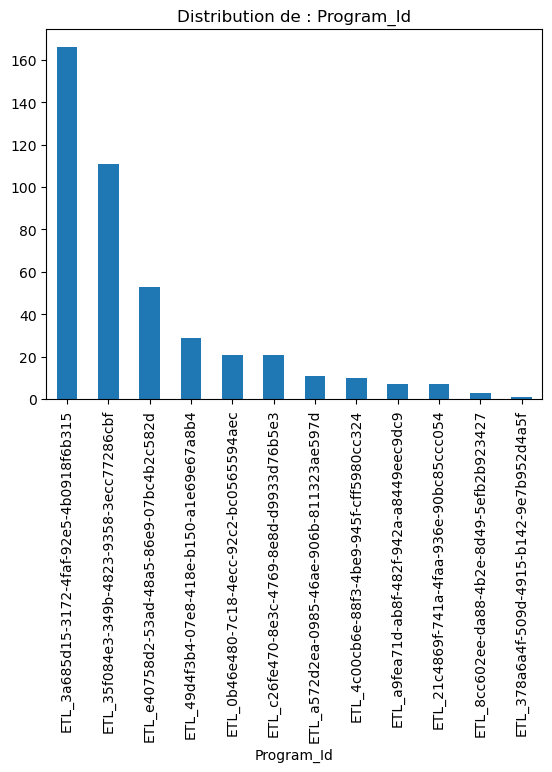

In [42]:
col= tab.columns[14]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

### Session

In [129]:
col= tab.columns[15]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Session


Session
PRIMEVER\VDRREPORTFRONT$    171489
Name: count, dtype: int64

Inutile de conserver cette colonne.

### Schedules_ld

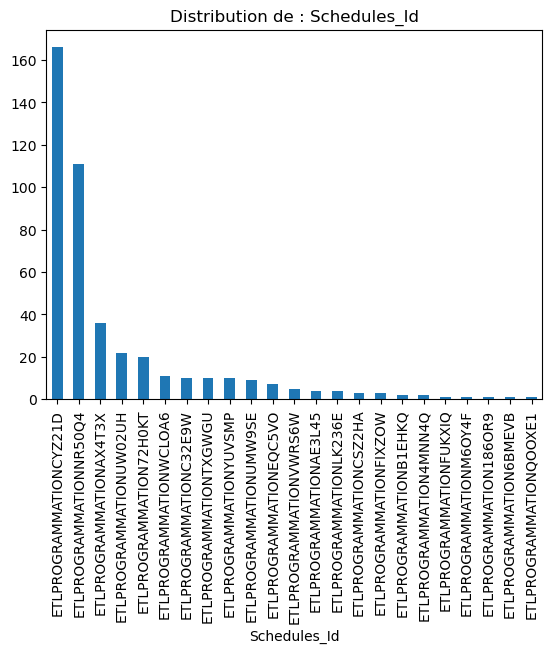

In [46]:
col= tab.columns[16]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

### Schedules Name

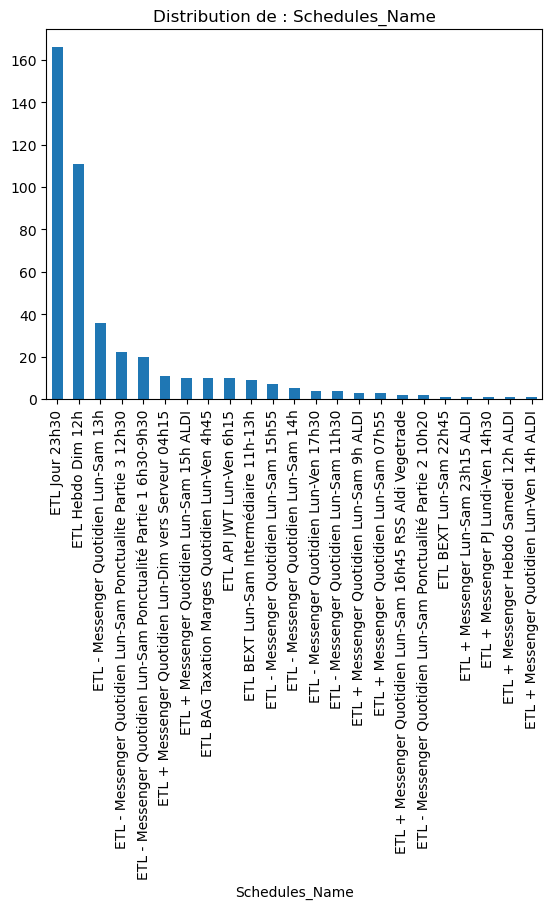

In [47]:
col= tab.columns[17]
g = tab[col].value_counts().plot.bar()
g.set_title('Distribution de : '+col)
plt.show()

### Schedules_StartDateTime

In [50]:
col= tab.columns[18]
print('Distribution de : '+col)
tab[col].value_counts()

Distribution de : Schedules_StartDateTime


Schedules_StartDateTime
2024-08-29 11:08:50    197560
2024-10-03 17:28:34      3848
2024-10-03 17:49:02       191
2024-10-03 17:47:44       191
2024-09-06 16:35:43       144
                        ...  
2024-09-21 10:57:01         1
2024-09-21 09:02:00         1
2024-09-21 07:56:55         1
2024-09-18 14:21:30         1
2024-09-23 22:47:09         1
Name: count, Length: 167, dtype: int64